In [27]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 从一个服从正态分布的集合里随机一个2行3列的矩阵
test1 = tf.Variable(tf.random_normal([2,3]))
# 将1行3列的矩阵所有数填充为0.1
test2 = tf.Variable(tf.zeros([1, 3]) + 0.1)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(test1))
    print(sess.run(test2))

[[-0.57324612 -0.63544047 -0.02479877]
 [-1.25881696 -0.59004849  0.06646515]]
[[ 0.1  0.1  0.1]]


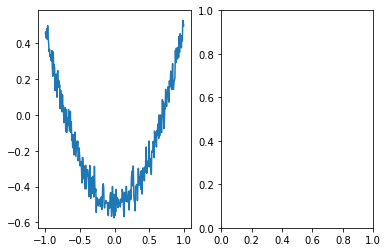

0.0521857
0.00957607
0.00671216
0.00526072
0.0043337
0.00377347
0.00346272
0.00329944
0.00320886
0.00315311
0.00312036
0.00310086
0.00308541
0.00305831
0.00303636
0.00301806
0.00300078
0.00299015
0.00298398
0.0029774


In [32]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    # add one more layer and return the output of this layer
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

# Make up some real data
# linspace产生一个-1到1的300个值的等差数列
x_data = np.linspace(-1,1,300)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

plt.figure(1, figsize=(8, 6))
plt.subplot(121)
plt.plot(x_data, y_data)
plt.ylim()
plt.legend(loc='best')
plt.show()

# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])
# add hidden layer
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
# add output layer
prediction = add_layer(l1, 10, 1, activation_function=None)

# the error between prediction and real data
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),
                                   reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# important step
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in range(1000):
    # training
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        print(sess.run(loss, feed_dict={xs: x_data, ys: y_data}))
